In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [5]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [6]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [7]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.418843, W: 0.458000, b: -0.664231
step: 100, loss: 0.361665, W: 0.434384, b: -0.496808
step: 150, loss: 0.316825, W: 0.413471, b: -0.348544
step: 200, loss: 0.281661, W: 0.394951, b: -0.217246
step: 250, loss: 0.254084, W: 0.378551, b: -0.100974
step: 300, loss: 0.232457, W: 0.364027, b: 0.001993
step: 350, loss: 0.215497, W: 0.351165, b: 0.093176
step: 400, loss: 0.202197, W: 0.339775, b: 0.173925
step: 450, loss: 0.191767, W: 0.329689, b: 0.245433
step: 500, loss: 0.183587, W: 0.320757, b: 0.308758
step: 550, loss: 0.177172, W: 0.312847, b: 0.364837
step: 600, loss: 0.172141, W: 0.305842, b: 0.414498
step: 650, loss: 0.168196, W: 0.299639, b: 0.458476
step: 700, loss: 0.165102, W: 0.294145, b: 0.497422
step: 750, loss: 0.162676, W: 0.289281, b: 0.531910
step: 800, loss: 0.160773, W: 0.284973, b: 0.562452
step: 850, loss: 0.159281, W: 0.281158, b: 0.589499
step: 900, loss: 0.158111, W: 0.277779, b: 0.613451
step: 950, loss: 0.157193, W: 0.274787, b: 0.634662
step: 10

In [8]:
import matplotlib.pyplot as plt


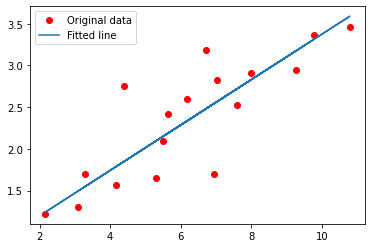

In [9]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()